In [38]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [39]:
train_df = pd.read_csv(r"E:\CodeBasic & Others\Fake new detection\train.csv")
valid_df = pd.read_csv(r"E:\CodeBasic & Others\Fake new detection\valid.csv")
test_df = pd.read_csv(r"E:\CodeBasic & Others\Fake new detection\test.csv")


In [40]:
train_df

,title,text,year_month,labels
0,"Denying feud over Russia hacking, Trump vows s...",langley va. washington u. s. president donald ...,2017-01,true
1,Obama Calls To Comfort A Murdered Lawmaker’s ...,picture someone decides one leaders traitor su...,2016-06,fake
2,Cost of modernizing U.S. nuclear weapons to fa...,minot air force base n. d. flat windy expanse ...,2016-09,true
3,THE MOMENT FBI Director James Comey Lost All C...,hillary clinton dogged throughout campaign dec...,2017-05,fake
4,Racist Florida Woman Tells Black People ‘You ...,racist white woman florida surely furious afri...,2016-08,fake
...,...,...,...,...
21522,Hyatt heir Pritzker opens Democratic bid to un...,chicago billionaire investor j. b. pritzker he...,2017-04,true
21523,New Hampshire to test broader appeal of Cruz's...,henniker new hampshire republican presidential...,2016-02,true
21524,Trevor Noah Asks Debbie Wasserman-Schultz If ...,democratic national committee dnc chairwoman d...,2016-04,fake
21525,HILLARY TRIES TO INJECT Social Class And Race ...,maybe hillary hiring someone handle social med...,2016-02,fake


In [41]:
valid_df

,title,text,year_month,labels
0,U.S. national monument review to test key land...,washington u. s. interior secretary ryan zinke...,2017-08,true
1,Kushner met with special counsel Mueller in Ru...,washington u. s. president donald trumps sonin...,2017-11,true
2,Sen. Cotton’s Intern Caught On Tape Calling B...,hey justin another title told one goes far. ho...,2017-06,fake
3,Honduras opposition proposes election recount ...,tegucigalpa honduran opposition battling presi...,2017-12,true
4,"Hope evaporating, a grim wait for relatives af...",mexico city relatives waiting wednesday outsid...,2017-09,true
...,...,...,...,...
8372,Palestinian cabinet convenes in Gaza in move t...,gaza prime minister rami alhamdallah chaired f...,2017-10,true
8373,"UAE law targets sexual harassment, forced labor",dubai united arab emirates criticized globally...,2017-09,true
8374,Japan's Osaka to snap sister city link with Sa...,tokyo mayor japan western city osaka plans cut...,2017-11,true
8375,British PM May meets Iraqi PM Abadi in Baghdad,baghdad british prime minister theresa may met...,2017-11,true


In [42]:
test_df

,title,text,year_month,labels
0,Disapproval rating for Japan PM Abe exceeds su...,tokyo disapproval rating japanese prime minist...,2017-10,true
1,Virginia officials postpone lottery drawing to...,lottery drawing settle tied virginia legislati...,2017-12,true
2,Trump administration issues new rules on U.S. ...,washington trump administration put new requir...,2017-12,true
3,Trump administration taps coal consultant for ...,washington trump administration thursday named...,2017-10,true
4,Clashes in Rome as police evict refugee squatt...,rome police using water cannon batons clashed ...,2017-08,true
...,...,...,...,...
8373,Investors see shades of Quebec in Catalonia vote,removes erroneous reference montreal quebec ca...,2017-12,true
8374,Ukraine rebel leader accuses sacked ally of st...,moscowkiev armed men masks blocked center ukra...,2017-11,true
8375,Gov. Cuomo Defends Not Endorsing Mayor de Blas...,ny governor andrew cuomo made two shocking ann...,2017-09,fake
8376,"John Anderson, liberal Republican who challeng...",washington john anderson former republican con...,2017-12,true


In [43]:
print("Train shape:", train_df.shape)
print("Validation shape:", valid_df.shape)
print("Test shape:", test_df.shape)



Train shape: (21527, 4)
Validation shape: (8377, 4)
Test shape: (8378, 4)


In [44]:
print(train_df.isnull().sum())


title         0
text          0
year_month    0
labels        0
dtype: int64


In [45]:
print(train_df.isnull().sum())
print(valid_df.isnull().sum())
print(test_df.isnull().sum())


title         0
text          0
year_month    0
labels        0
dtype: int64
title         0
text          0
year_month    0
labels        0
dtype: int64
title         0
text          0
year_month    0
labels        0
dtype: int64


In [46]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21527 entries, 0 to 21526
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       21527 non-null  object
 1   text        21527 non-null  object
 2   year_month  21527 non-null  object
 3   labels      21527 non-null  object
dtypes: object(4)
memory usage: 672.8+ KB
None


In [47]:
print(train_df.columns)
print(train_df['labels'].value_counts())

Index(['title', 'text', 'year_month', 'labels'], dtype='object')
labels
fake    13781
true     7746
Name: count, dtype: int64


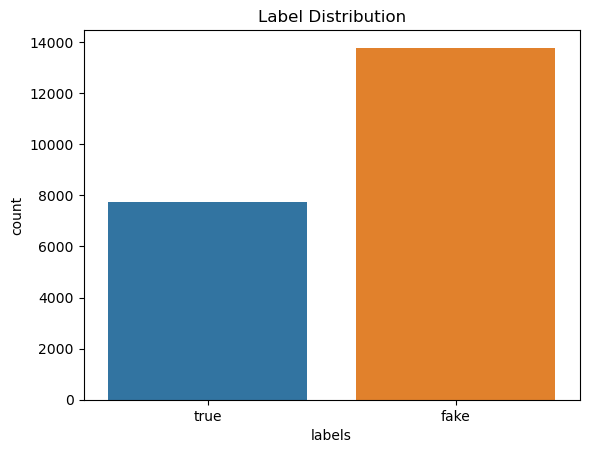

labels
fake    13781
true     7746
Name: count, dtype: int64


In [48]:
# Plot class distribution
sns.countplot(x='labels', data=train_df)
plt.title('Label Distribution')
plt.show()

# Check balance
print(train_df['labels'].value_counts())


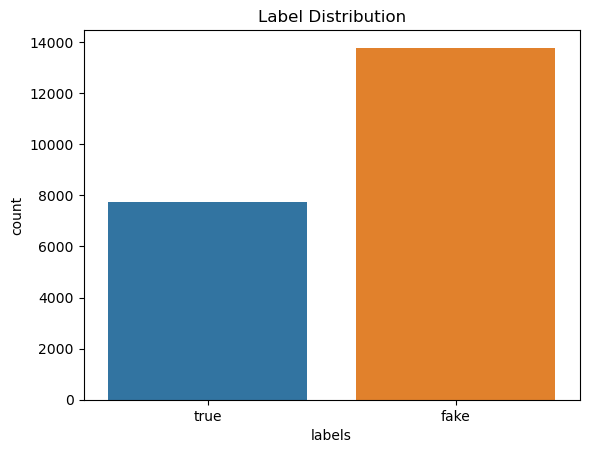

In [49]:
sns.countplot(x='labels', data=train_df)
plt.title("Label Distribution")
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


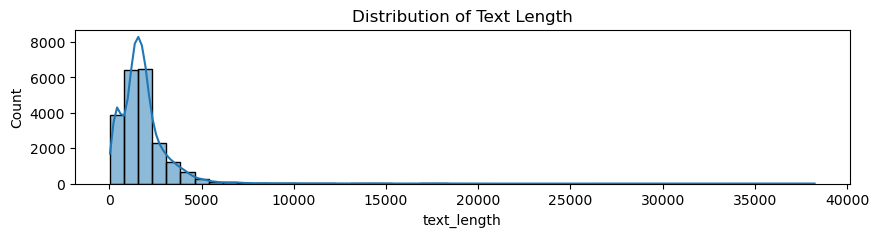

In [50]:
train_df['text_length'] = train_df['text'].apply(len)

plt.figure(figsize=(10, 2))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Length")
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


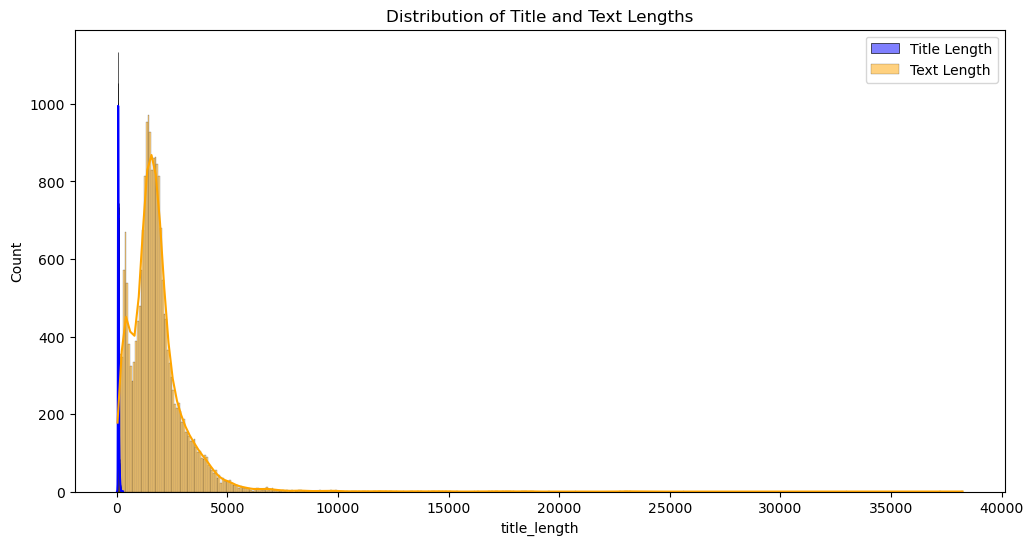

In [51]:
# Text length distribution
train_df['title_length'] = train_df['title'].apply(len)
train_df['text_length'] = train_df['text'].apply(len)

# Plotting the lengths
plt.figure(figsize=(12, 6))
sns.histplot(train_df['title_length'], kde=True, color='blue', label='Title Length')
sns.histplot(train_df['text_length'], kde=True, color='orange', label='Text Length')
plt.legend()
plt.title('Distribution of Title and Text Lengths')
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


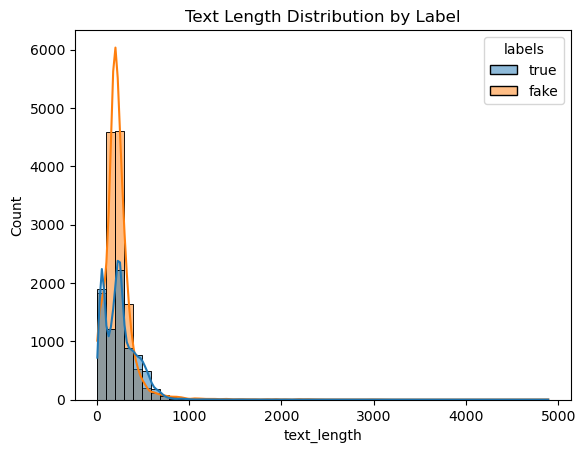

In [52]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(str(x).split()))

sns.histplot(data=train_df, x='text_length', hue='labels', bins=50, kde=True)
plt.title('Text Length Distribution by Label')
plt.show()


<Axes: xlabel='labels'>

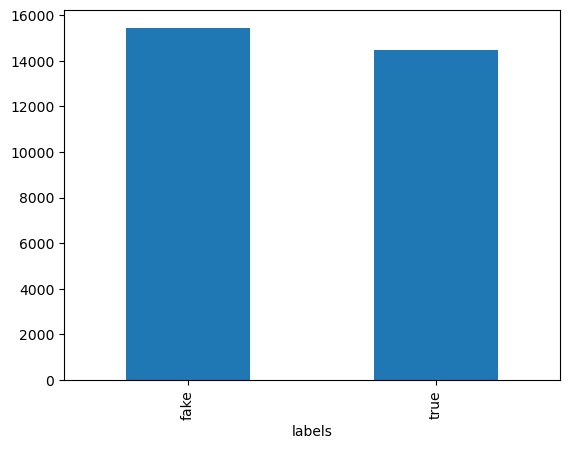

In [53]:
eda_df = pd.concat([train_df, valid_df], axis=0)
eda_df['labels'].value_counts().plot(kind='bar')


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['labels'] = le.fit_transform(train_df['labels'])
valid_df['labels'] = le.transform(valid_df['labels'])
test_df['labels'] = le.transform(test_df['labels'])


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train = vectorizer.fit_transform(train_df['text'])
X_valid = vectorizer.transform(valid_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['labels']
y_valid = valid_df['labels']
y_test = test_df['labels']


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Make predictions on validation and test data
y_valid_pred = rf.predict(X_valid)
y_test_pred = rf.predict(X_test)

# Evaluate accuracy on validation set
valid_acc = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_acc:.4f}")

# Evaluate accuracy on test set
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Detailed classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix on test data
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Validation Accuracy: 0.7858
Test Accuracy: 0.7841

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.48      0.98      0.64      1655
           1       0.99      0.73      0.85      6723

    accuracy                           0.78      8378
   macro avg       0.74      0.86      0.74      8378
weighted avg       0.89      0.78      0.81      8378


Confusion Matrix on Test Data:
[[1630   25]
 [1784 4939]]


In [58]:
test_pred = rf.predict(X_test)
print("Test predictions sample:")
print(test_pred[:10])


Test predictions sample:
[1 1 1 1 0 1 1 1 1 0]


In [59]:
import pandas as pd

# Predict on test data
test_pred = rf.predict(X_test)

# Create a DataFrame to compare actual and predicted labels
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_pred
})

# Show first 10 rows
print(comparison_df.head(10))


   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          0
5       1          1
6       1          1
7       1          1
8       1          1
9       0          0


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on validation and test sets
y_valid_pred = log_reg.predict(X_valid)
y_test_pred = log_reg.predict(X_test)

# Accuracy scores
print(f"Validation Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Classification report on test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix on test set
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))

# Compare actual vs predicted for test data (first 10 samples)
import pandas as pd
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
print("\nActual vs Predicted labels (first 10):")
print(comparison_df.head(10))


Validation Accuracy: 0.8838
Test Accuracy: 0.8781

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1655
           1       1.00      0.85      0.92      6723

    accuracy                           0.88      8378
   macro avg       0.81      0.92      0.84      8378
weighted avg       0.92      0.88      0.89      8378


Confusion Matrix on Test Data:
[[1628   27]
 [ 994 5729]]

Actual vs Predicted labels (first 10):
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          0
5       1          1
6       1          1
7       1          1
8       1          1
9       0          0


In [61]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42, max_iter=1000)
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


SVM Test Accuracy: 0.9003


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='linear', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict on validation sets
y_valid_pred_log = log_reg.predict(X_valid)
y_valid_pred_svm = svm.predict(X_valid)
y_valid_pred_rf = rf.predict(X_valid)
y_valid_pred_xgb = xgb.predict(X_valid)

# Predict on test sets
y_test_pred_log = log_reg.predict(X_test)
y_test_pred_svm = svm.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_xgb = xgb.predict(X_test)

# Function to print evaluation metrics
def evaluate_model(name, y_true_valid, y_pred_valid, y_true_test, y_pred_test):
    print(f"\n=== {name} ===")
    print(f"Validation Accuracy: {accuracy_score(y_true_valid, y_pred_valid):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_true_test, y_pred_test):.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_true_test, y_pred_test))
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_true_test, y_pred_test))

# Evaluate all models
evaluate_model("Logistic Regression", y_valid, y_valid_pred_log, y_test, y_test_pred_log)
evaluate_model("SVM (Linear Kernel)", y_valid, y_valid_pred_svm, y_test, y_test_pred_svm)
evaluate_model("Random Forest", y_valid, y_valid_pred_rf, y_test, y_test_pred_rf)
evaluate_model("XGBoost", y_valid, y_valid_pred_xgb, y_test, y_test_pred_xgb)

# Example: Compare actual vs predicted on test data for Logistic Regression (first 10 samples)
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_LogReg': y_test_pred_log,
    'Predicted_SVM': y_test_pred_svm,
    'Predicted_RF': y_test_pred_rf,
    'Predicted_XGB': y_test_pred_xgb
})
print("\nActual vs Predicted Labels (Test Data) - first 10 samples:")
print(comparison_df.head(10))



=== Logistic Regression ===
Validation Accuracy: 0.8838
Test Accuracy: 0.8781

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1655
           1       1.00      0.85      0.92      6723

    accuracy                           0.88      8378
   macro avg       0.81      0.92      0.84      8378
weighted avg       0.92      0.88      0.89      8378

Confusion Matrix (Test):
[[1628   27]
 [ 994 5729]]

=== SVM (Linear Kernel) ===
Validation Accuracy: 0.9064
Test Accuracy: 0.8999

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1655
           1       1.00      0.88      0.93      6723

    accuracy                           0.90      8378
   macro avg       0.83      0.93      0.86      8378
weighted avg       0.93      0.90      0.91      8378

Confusion Matrix (Test):
[[1634   21]
 [ 818 5905]]

=== Random Forest ===